# SPR Data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

Populating the interactive namespace from numpy and matplotlib


**Dataset Size:**

First let us check the number of rows in train and test file :
- Number of rows in train :  13'647309
- Number of rows in test :  929615
- Number of clients (train dataset) : 956645

**Dataset columns:**
  
  
Main columns :   

- fecha_dato 	The table is partitioned for this column
- ncodpers 	Customer code
- ind_empleado 	Employee index: A active, B ex employed, F filial, N not employee, P pasive
- pais_residencia 	Customer's Country residence
- sexo 	Customer's sex
- age 	Age
- fecha_alta 	The date in which the customer became as the first holder of a contract in the bank
- ind_nuevo 	New customer Index. 1 if the customer registered in the last 6 months.
- antiguedad 	Customer seniority (in months)
- indrel 	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
- ult_fec_cli_1t 	Last date as primary customer (if he isn't at the end of the month)
- indrel_1mes 	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
- tiprel_1mes 	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
- indresi 	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
- indext 	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
- conyuemp 	Spouse index. 1 if the customer is spouse of an employee
- canal_entrada 	channel used by the customer to join
- indfall 	Deceased index. N/S
- tipodom 	Addres type. 1, primary address
- cod_prov 	Province code (customer's address)
- nomprov 	Province name
- ind_actividad_cliente 	Activity index (1, active customer; 0, inactive customer)
- renta 	Gross income of the household
- segmento 	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated    
    
    
target columns : 
    
- ind_ahor_fin_ult1 	Saving Account
- ind_aval_fin_ult1 	Guarantees
- ind_cco_fin_ult1 	Current Accounts
- ind_cder_fin_ult1 	Derivada Account
- ind_cno_fin_ult1 	Payroll Account
- ind_ctju_fin_ult1 	Junior Account
- ind_ctma_fin_ult1 	Más particular Account
- ind_ctop_fin_ult1 	particular Account
- ind_ctpp_fin_ult1 	particular Plus Account
- ind_deco_fin_ult1 	Short-term deposits
- ind_deme_fin_ult1 	Medium-term deposits
- ind_dela_fin_ult1 	Long-term deposits
- ind_ecue_fin_ult1 	e-account
- ind_fond_fin_ult1 	Funds
- ind_hip_fin_ult1 	Mortgage
- ind_plan_fin_ult1 	Pensions
- ind_pres_fin_ult1 	Loans
- ind_reca_fin_ult1 	Taxes
- ind_tjcr_fin_ult1 	Credit Card
- ind_valo_fin_ult1 	Securities
- ind_viv_fin_ult1 	Home Account
- ind_nomina_ult1 	Payroll
- ind_nom_pens_ult1 	Pensions
- ind_recibo_ult1 	Direct Debit    
    

In [2]:
TARGET_LABELS = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

## Data stats: data per month representations

In [ ]:
data_path = "data/"
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['fecha_dato', 'ncodpers'], parse_dates=['fecha_dato'])

Number of clients

In [ ]:
len(train['ncodpers'].unique())

Setup month start/end row indices

In [ ]:
gb = train.groupby('fecha_dato')
data_count_per_month = gb.agg('size')

In [ ]:
month_start_end_row_indices = {}
for key, group_value in gb:
    month_start_end_row_indices[key] = [group_value.index[0], group_value.index[-1]]
    
#month_start_end_row_indices    

In [ ]:
plt.figure(figsize=(12,4))

#values = np.log((data_count_per_month.values - np.min(data_count_per_month.values)) + 1)
values = data_count_per_month.values

sns.barplot(data_count_per_month.index, values, alpha=0.8, color=color[2])
plt.ylabel('Data quantity, counts', fontsize=12)
plt.xlabel('Data time span, months', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
del train
del gb

### Analyse a month

Read a month

In [ ]:
month_key=pd.Timestamp('2015-11-28 00:00:00')

In [ ]:
skiprows = month_start_end_row_indices[month_key][0]
nrows = month_start_end_row_indices[month_key][1] - skiprows + 1
train_month = pd.read_csv(data_path+"train_ver2.csv", skiprows=range(1, skiprows+1), nrows=nrows)

In [ ]:
month_full_stats = train_month.describe()
month_full_stats

In [ ]:
print train_month.columns.values[11], train_month.columns.values[15]

In [ ]:
train_month["fecha_dato"] = pd.to_datetime(train_month["fecha_dato"],format="%Y-%m-%d")
train_month["fecha_alta"] = pd.to_datetime(train_month["fecha_alta"],format="%Y-%m-%d")
train_month["age"] = pd.to_numeric(train_month["age"], errors="coerce")

In [ ]:
train_month.isnull().any()

In [ ]:
string_data = train_month.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

### Load test dataset

In [4]:
data_path = "data/"
test = pd.read_csv(data_path+"test_ver2.csv")

/home/osboxes/Documents/TDS/venv/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Cleaning

In [5]:
#df = train_month
df = test

There are some 'unknown' users in train dataset only

In [6]:
print np.sum(df['sexo'].isnull()), np.sum(df['pais_residencia'].isnull()), np.sum(df['ind_empleado'].isnull()), np.sum(df['age'].isnull()), np.sum(df['fecha_alta'].isnull())


5 0 0 0 0


In [7]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()

In [8]:
np.sum(unknown_users)

0

In [9]:
df[unknown_users].tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento


In [10]:
df[unknown_users][TARGET_LABELS].tail()

KeyError: "['ind_ahor_fin_ult1' 'ind_aval_fin_ult1' 'ind_cco_fin_ult1'\n 'ind_cder_fin_ult1' 'ind_cno_fin_ult1' 'ind_ctju_fin_ult1'\n 'ind_ctma_fin_ult1' 'ind_ctop_fin_ult1' 'ind_ctpp_fin_ult1'\n 'ind_deco_fin_ult1' 'ind_deme_fin_ult1' 'ind_dela_fin_ult1'\n 'ind_ecue_fin_ult1' 'ind_fond_fin_ult1' 'ind_hip_fin_ult1'\n 'ind_plan_fin_ult1' 'ind_pres_fin_ult1' 'ind_reca_fin_ult1'\n 'ind_tjcr_fin_ult1' 'ind_valo_fin_ult1' 'ind_viv_fin_ult1'\n 'ind_nomina_ult1' 'ind_nom_pens_ult1' 'ind_recibo_ult1'] not in index"

**Remove these users** !

In [ ]:
df.drop(df[unknown_users].index, inplace=True)

In [ ]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()
np.sum(unknown_users)

In [ ]:
df.isnull().any()

Start with gender -> replace nan with UNKNOWN

In [11]:
df['sexo'].unique()

array(['V', 'H', nan], dtype=object)

In [12]:
df.loc[df['sexo'].isnull(),'sexo'] = "UNKNOWN"

In [13]:
df['sexo'].unique()

array(['V', 'H', 'UNKNOWN'], dtype=object)

In [14]:
df['sexo'].value_counts()

V          504515
H          425095
UNKNOWN         5
Name: sexo, dtype: int64

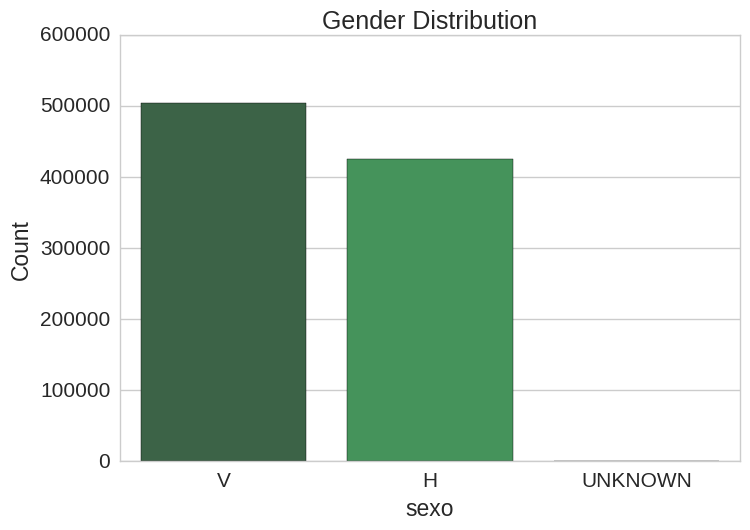

In [15]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="sexo", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Gender Distribution")
    plt.ylabel("Count")

Continue with age -> replace nan with mean , less 18 -> mean between 18, 30 and greater than 90 -> mean between 30, 90

In [16]:
df['age'].unique()

array([ 56,  36,  22,  51,  41,  33,  23,  43,  63,  62,  32,  58,  71,
        31,  30,  59,  45,  37,  39,  38,  46,  34,  35,  42,  29,  88,
        64,  48,  72,  47,  27,  24,  50,  49,  57,  67,  25,  28,  13,
        40,  53,  54,  26,  11,  21,  60,  44,  55,   7,  52,  66,  90,
        73,  78,  79,  61,  69,  12,   9,  65,  77,  83,  81,  10,   5,
        18,  17,  87,  70,  80,  75,  68,  74,  16,   4,  82,  91,  76,
        19,  15,   6,  97,  89,  85,  86,  14,  20,   8,  84,  95,  93,
       100,  96,  92,  98,  94, 105, 102, 101, 104, 103,  99,   3,   2,
       116, 106, 107, 109, 110, 117, 108, 113, 111, 112, 114, 164, 118, 127])

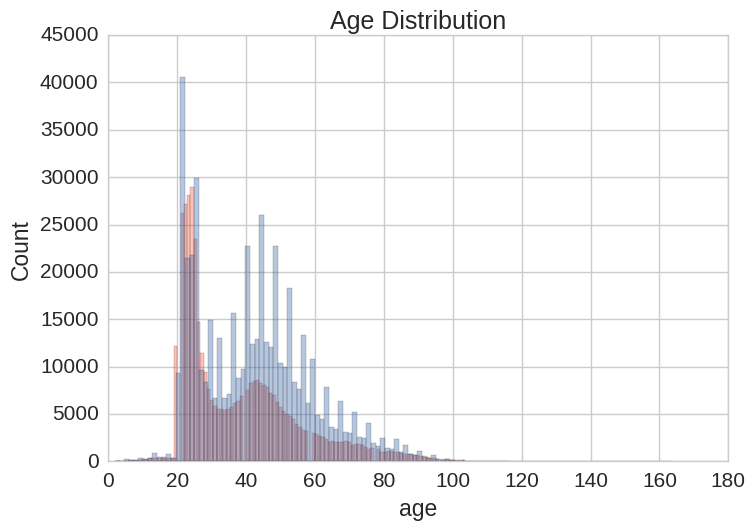

In [17]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=120,
                 kde=False)
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [18]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

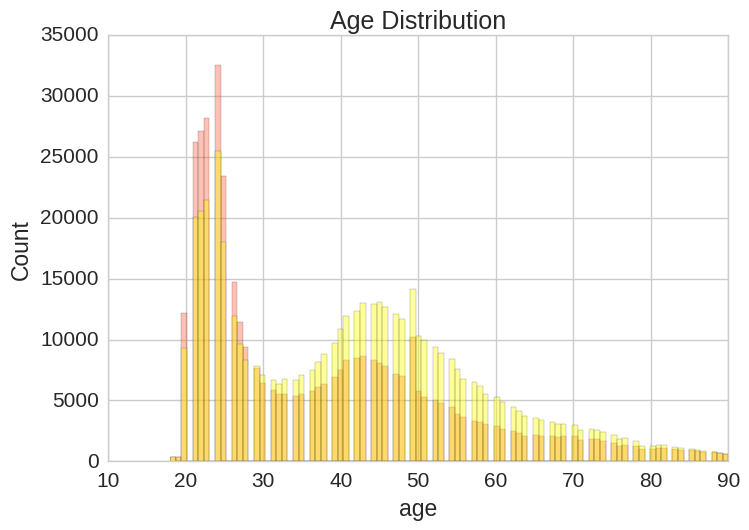

In [19]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color='yellow')
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

Next `ind_empleado` : nan -> UNKNOWN

In [20]:
df['ind_empleado'].unique()

array(['F', 'N', 'A', 'B', 'S'], dtype=object)

In [21]:
df['ind_empleado'].fillna("UNKNOWN",inplace=True)

In [22]:
df['ind_empleado'].unique()

array(['F', 'N', 'A', 'B', 'S'], dtype=object)

In [23]:
df['ind_empleado'].value_counts()

N    929096
B       218
F       152
A       148
S         1
Name: ind_empleado, dtype: int64

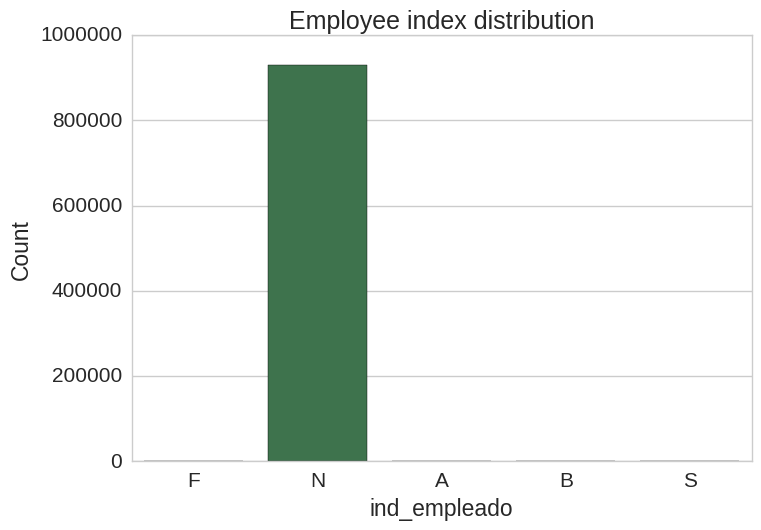

In [24]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="ind_empleado", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Employee index distribution")
    plt.ylabel("Count")

Next `pais_residencia` : nan -> UNKNOWN

In [25]:
df['pais_residencia'].unique()

array(['ES', 'CH', 'DE', 'GB', 'BE', 'DJ', 'IE', 'QA', 'US', 'VE', 'DO',
       'SE', 'AR', 'CA', 'PL', 'CN', 'CM', 'FR', 'AT', 'RO', 'LU', 'PT',
       'CL', 'IT', 'MR', 'MX', 'SN', 'BR', 'CO', 'PE', 'RU', 'LT', 'EE',
       'MA', 'HN', 'BG', 'NO', 'GT', 'UA', 'NL', 'GA', 'IL', 'JP', 'EC',
       'IN', 'DZ', 'ET', 'SA', 'HU', 'JM', 'CI', 'CU', 'BO', 'TG', 'TN',
       'NG', 'AU', 'GR', 'DK', 'LB', 'UY', 'TH', 'SG', 'MD', 'SK', 'AD',
       'BY', 'HK', 'HR', 'EG', 'GQ', 'PR', 'ZA', 'PA', 'KE', 'TR', 'FI',
       'BA', 'SV', 'PY', 'PK', 'KR', 'AO', 'GN', 'IS', 'TW', 'MK', 'VN',
       'CZ', 'CR', 'MZ', 'MT', 'LY', 'GH', 'KH', 'AE', 'RS', 'OM', 'GE',
       'NI', 'GI', 'NZ', 'MM', 'PH', 'KW', 'BM', 'CG', 'ML', 'AL', 'ZW',
       'CF', 'GM', 'CD', 'BZ', 'KZ', 'GW', 'SL', 'LV'], dtype=object)

In [26]:
df['pais_residencia'].fillna('UNKNOWN', inplace=True)

In [27]:
df['pais_residencia'].unique()

array(['ES', 'CH', 'DE', 'GB', 'BE', 'DJ', 'IE', 'QA', 'US', 'VE', 'DO',
       'SE', 'AR', 'CA', 'PL', 'CN', 'CM', 'FR', 'AT', 'RO', 'LU', 'PT',
       'CL', 'IT', 'MR', 'MX', 'SN', 'BR', 'CO', 'PE', 'RU', 'LT', 'EE',
       'MA', 'HN', 'BG', 'NO', 'GT', 'UA', 'NL', 'GA', 'IL', 'JP', 'EC',
       'IN', 'DZ', 'ET', 'SA', 'HU', 'JM', 'CI', 'CU', 'BO', 'TG', 'TN',
       'NG', 'AU', 'GR', 'DK', 'LB', 'UY', 'TH', 'SG', 'MD', 'SK', 'AD',
       'BY', 'HK', 'HR', 'EG', 'GQ', 'PR', 'ZA', 'PA', 'KE', 'TR', 'FI',
       'BA', 'SV', 'PY', 'PK', 'KR', 'AO', 'GN', 'IS', 'TW', 'MK', 'VN',
       'CZ', 'CR', 'MZ', 'MT', 'LY', 'GH', 'KH', 'AE', 'RS', 'OM', 'GE',
       'NI', 'GI', 'NZ', 'MM', 'PH', 'KW', 'BM', 'CG', 'ML', 'AL', 'ZW',
       'CF', 'GM', 'CD', 'BZ', 'KZ', 'GW', 'SL', 'LV'], dtype=object)

In [28]:
df['pais_residencia'].value_counts()

ES    925619
FR       311
AR       288
GB       286
DE       281
US       231
CO       211
IT       179
RO       175
MX       156
BR       141
VE       136
EC       130
CH       124
BO        93
BE        93
PT        90
PY        87
CL        59
PE        54
NL        47
RU        45
CU        44
PL        38
SE        37
CN        33
UY        30
AT        29
UA        29
BG        28
       ...  
MZ         2
JM         2
CG         2
ET         2
GW         2
OM         2
LV         1
LY         1
MT         1
ML         1
MM         1
KZ         1
SL         1
TN         1
KH         1
IS         1
GH         1
GI         1
GM         1
GE         1
DJ         1
CD         1
CF         1
BZ         1
BM         1
KW         1
AL         1
ZW         1
TG         1
LB         1
Name: pais_residencia, dtype: int64

Next `fecha_alta` : 

In [29]:
df['fecha_alta'].isnull().sum()

0

In [ ]:
## something in the middle of the pack
# dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
# median_date = int(np.median(dates.index.values))
# df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
# df["fecha_alta"].describe()

#### Display number of customers joined per year/month 

In [30]:
to_yearmonth = lambda x: int(100 * x.year + x.month)
yearmonth = df['fecha_alta'].apply(to_yearmonth)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
yearmonth_counts = yearmonth.value_counts()
print("Minimum value of fecha_alta : ", min(yearmonth_counts.index))
print("Maximum value of fecha_alta : ", max(yearmonth_counts.index))

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(yearmonth_counts.index, yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

In [ ]:
zoom_yearmonth_counts = yearmonth_counts.sort_index()
zoom_yearmonth_counts = zoom_yearmonth_counts[185:]

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(zoom_yearmonth_counts.index, zoom_yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

Next `ult_fec_cli_1t` (Last date as primary customer (if he isn't at the end of the month)) : nan -> UNKNOWN

In [ ]:
print df['ult_fec_cli_1t'].isnull().sum(), df['ult_fec_cli_1t'].shape

In [ ]:
df['ult_fec_cli_1t'].unique()

In [ ]:
df['ult_fec_cli_1t'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['ult_fec_cli_1t'].unique()

Next `conyuemp` (Spouse index. 1 if the customer is spouse of an employee) : nan -> UNKNOWN

In [ ]:
print df['conyuemp'].isnull().sum(), df['conyuemp'].shape

In [ ]:
df['conyuemp'].unique()

In [ ]:
df['conyuemp'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['conyuemp'].unique()

In [ ]:
df['conyuemp'].value_counts()

Next `canal_entrada` (channel used by the customer to join) : nan -> UNKNOWN

In [ ]:
print df['canal_entrada'].isnull().sum(), df['canal_entrada'].shape

In [ ]:
df['canal_entrada'].unique()

In [ ]:
df['canal_entrada'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['canal_entrada'].unique()

In [ ]:
df['canal_entrada'].value_counts()

Next `cod_prov` : nan -> UNKNOWN

In [31]:
df['cod_prov'].unique()

array([ 28.,   3.,  15.,   8.,   7.,  35.,  45.,  14.,  30.,  16.,  29.,
        23.,  11.,  41.,  46.,  12.,   6.,  32.,  17.,  18.,  13.,  39.,
        10.,  52.,  33.,  50.,  22.,  44.,  27.,   9.,  31.,  47.,  37.,
        26.,  25.,  24.,  20.,  43.,  42.,   2.,  40.,  21.,  36.,   4.,
         5.,  34.,  19.,   1.,  49.,  38.,  nan,  48.,  51.])

In [32]:
df['cod_prov'].isnull().sum()

3996

In [33]:
print df['cod_prov'].isnull().sum(), len(df['cod_prov'].unique())
print df['nomprov'].isnull().sum(), len(df['nomprov'].unique())
print df['tipodom'].isnull().sum(), len(df['tipodom'].unique())

3996 53
3996 53
0 1


**Remove 'tipodom' and 'cod_prov' columns**

In [34]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

Next `nomprov` : nan -> UNKNOWN

In [35]:
df['nomprov'].unique()

array(['MADRID', 'ALICANTE', 'CORU\xc3\x91A, A', 'BARCELONA',
       'BALEARS, ILLES', 'PALMAS, LAS', 'TOLEDO', 'CORDOBA', 'MURCIA',
       'CUENCA', 'MALAGA', 'JAEN', 'CADIZ', 'SEVILLA', 'VALENCIA',
       'CASTELLON', 'BADAJOZ', 'OURENSE', 'GIRONA', 'GRANADA',
       'CIUDAD REAL', 'CANTABRIA', 'CACERES', 'MELILLA', 'ASTURIAS',
       'ZARAGOZA', 'HUESCA', 'TERUEL', 'LUGO', 'BURGOS', 'NAVARRA',
       'VALLADOLID', 'SALAMANCA', 'RIOJA, LA', 'LERIDA', 'LEON',
       'GIPUZKOA', 'TARRAGONA', 'SORIA', 'ALBACETE', 'SEGOVIA', 'HUELVA',
       'PONTEVEDRA', 'ALMERIA', 'AVILA', 'PALENCIA', 'GUADALAJARA',
       'ALAVA', 'ZAMORA', 'SANTA CRUZ DE TENERIFE', nan, 'BIZKAIA', 'CEUTA'], dtype=object)

In [36]:
df.loc[df['nomprov']=="CORU\xc3\x91A, A","nomprov"] = "CORUNA"

In [37]:
df['nomprov'].fillna('UNKNOWN', inplace=True)

In [38]:
df['nomprov'].value_counts()

MADRID                    298250
BARCELONA                  88579
VALENCIA                   47996
SEVILLA                    40492
CORUNA                     28715
MURCIA                     27752
MALAGA                     24546
ZARAGOZA                   23160
ALICANTE                   22147
CADIZ                      19795
PONTEVEDRA                 18961
ASTURIAS                   18300
PALMAS, LAS                16332
VALLADOLID                 16018
BADAJOZ                    12936
TOLEDO                     12658
BIZKAIA                    12494
GRANADA                    12392
SALAMANCA                  11071
CANTABRIA                  10824
CORDOBA                     9831
BALEARS, ILLES              9130
CACERES                     8598
CIUDAD REAL                 8075
HUELVA                      8018
ALBACETE                    7780
TARRAGONA                   7631
CASTELLON                   7145
BURGOS                      6645
GIRONA                      6304
NAVARRA   

Number of clients with unknown `nomprov` staying in Spain

In [39]:
((df['nomprov'] == "UNKNOWN") & (df['pais_residencia'] == "ES")).sum()

5

Number of clients with unknown `nomprov` not staying in Spain

In [40]:
((df['nomprov'] == "UNKNOWN") & (df['pais_residencia'] != "ES")).sum()

3991

Number of clients not staying in Spain



In [41]:
((df['pais_residencia'] != "ES")).sum()

3996

Number of clients not staying in Spain with known (spanish) `nomprov`

In [42]:
mask = (df['nomprov'] != "UNKNOWN") & (df['pais_residencia'] != "ES")
print mask.sum()
df[mask][['nomprov', 'pais_residencia', 'renta', 'ind_empleado', 'segmento']]

5


,nomprov,pais_residencia,renta,ind_empleado,segmento
570335,GUADALAJARA,PY,128107.92,N,02 - PARTICULARES
575865,"PALMAS, LAS",PY,NA,N,02 - PARTICULARES
669958,MADRID,BO,94299.96,N,02 - PARTICULARES
672229,MADRID,IT,149309.34,N,02 - PARTICULARES
678727,MADRID,DE,141913.68,N,02 - PARTICULARES


**Remove clients not staying in Spain with known (spanish) `nomprov`**

In [ ]:
mask = (df['nomprov'] != "UNKNOWN") & (df['pais_residencia'] != "ES")
df.drop(df[mask].index, inplace=True)

Target labels : `ind_nomina_ult1`, `ind_nom_pens_ult1` : nan -> 0

In [ ]:
print df.ind_nomina_ult1.isnull().sum(), df.ind_nom_pens_ult1.isnull().sum()

I could try to fill in missing values for products by looking at previous months, but since it's such a small number of values for now I'll take the cheap way out.

In [ ]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

Fix nan for `segmento` by "UNKNOWN"

In [ ]:
print df['segmento'].isnull().sum(), len(df['segmento'].unique())

In [ ]:
df['segmento'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['segmento'].value_counts()

### Now for gross income, aka `renta`

In [ ]:
print df['renta'].isnull().sum(), len(df['renta'].unique())

Display mean, std, median income in a region

In [ ]:
incomes_gb = df[df['renta'].notnull()].groupby('nomprov')

In [ ]:
incomes = incomes_gb.agg({"renta":{"count": size, "median":median, "mean": mean, "std": std, "min": min, "max": max}})
incomes.sort_values(by=("renta","median"),inplace=True)
incomes.reset_index(inplace=True)

In [ ]:
incomes.tail()

In [ ]:
print len(incomes['nomprov'].unique()), len(incomes['nomprov'])

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.boxplot(x="nomprov", y="renta", data=df[df['renta'].notnull()])
    plt.xlabel("Region")
    plt.xticks(rotation='vertical')
    plt.ylabel('Income', fontsize=12)

Display income per region, employee index, segment, gender

In [ ]:
incomes_gb = df[df['renta'].notnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])

In [ ]:
incomes_stats = incomes_gb.agg({"renta":{"count": size, "median":median, "mean": mean, "std": std, "min": min, "max": max}})
incomes_stats.sort_values(by=("renta","median"),inplace=True)

In [ ]:
incomes_stats.loc['MADRID']

Analyze those who do not declare their incomes

In [ ]:
print ((df['renta'].isnull()) & (df['nomprov'] == "MADRID")).sum(), ((df['renta'].notnull()) & (df['nomprov'] == "MADRID")).sum()

In [ ]:
nan_incomes_gb = df[df['renta'].isnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])

In [ ]:
nan_incomes_stats = nan_incomes_gb.agg('size')

In [ ]:
nan_incomes_stats.loc['ALAVA']

Fill `renta` nan -> median per region, employee index, segment, gender if not defined replace by -99

In [ ]:
incomes_gb = df[df['renta'].notnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])
incomes_stats = incomes_gb.agg("median")
nan_incomes_gb = df[df['renta'].isnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])
nan_incomes_stats = nan_incomes_gb.agg("size")

In [ ]:
for key, group_value in nan_incomes_gb:
    if key in incomes_stats.index:
        df.loc[group_value.index, 'renta'] = incomes_stats.loc[key]['renta']
#         print "Set value : ", incomes_stats.loc[key]['renta']
    else:
#         print "Key is not found : ", key, "Count = ", nan_incomes_stats.loc[key]
#         print "Set invalid value : -99"
        df.loc[group_value.index, 'renta'] = -99
    

In [ ]:
print df['renta'].isnull().sum(), len(df['renta'].unique())

In [ ]:
df.isnull().any().sum()

In [ ]:
df.isnull().any()

In [ ]:
df['indrel_1mes'].unique()

In [ ]:
df['indrel_1mes'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['indrel_1mes'].value_counts()

In [ ]:
df['indrel_1mes'] = df['indrel_1mes'].astype(str).str.replace('.0', '')

In [ ]:
df['indrel_1mes'].value_counts()

In [ ]:
df['indrel'].unique()

In [ ]:
df['tiprel_1mes'].unique()

In [ ]:
df['tiprel_1mes'].fillna('UNKNOWN', inplace=True)

In [ ]:
df['tiprel_1mes'].value_counts()

In [ ]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'])
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])

In [ ]:
((df['indrel_1mes'] == "UNKNOWN") & (df['tiprel_1mes'] == "UNKNOWN") & (df['fecha_dato'].dt.month == df['fecha_alta'].dt.month)).sum()

In [ ]:
mask = (df['indrel_1mes'] == "UNKNOWN") & (df['tiprel_1mes'] == "UNKNOWN") & (df['fecha_dato'].dt.month == df['fecha_alta'].dt.month)

In [ ]:
df[mask][['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t', 'indrel']].head(10)

In [ ]:
#df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
#df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df.loc[mask & (df['indrel'] == 1), 'indrel_1mes'] = '1'
df.loc[mask & (df['indrel'] == 99), 'indrel_1mes'] = '3'
df.loc[mask, 'tiprel_1mes'] = 'A'

In [ ]:
df['tiprel_1mes'].value_counts()

In [ ]:
df['indrel_1mes'].value_counts()

In [ ]:
train_month['logrenta'] = np.log(train_month['renta'] + 1)

Apply PCA to reduce the number of entries

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10000)

In [ ]:
train_month_t = train_month.transpose()
reduced_train_month_t = pca.fit_transform(train_month_t)

In [ ]:
unique_ids   = pd.Series(train_month["ncodpers"].unique())
limit_people = 50000
unique_id    = unique_ids.sample(n=limit_people)
reduced_train_month = train_month[train_month.ncodpers.isin(unique_id)]
month_reduced_stats = reduced_train_month.describe()
month_reduced_stats

In [ ]:
res = np.abs(month_full_stats - month_reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
print np.sum(res, axis=1)
print np.sum(np.sum(res, axis=1))
res

In [ ]:
unique_ids   = pd.Series(train_month["ncodpers"].unique())
limit_people = 50000

counter = 100
found = False
tol = 0.1
while counter > 0 and not found:
    counter -= 1
    unique_id = unique_ids.sample(n=limit_people)
    reduced_train_month = train_month[train_month.ncodpers.isin(unique_id)]
    month_reduced_stats = reduced_train_month.describe()
    err = np.abs(month_full_stats - month_reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
    q = np.sum(np.sum(err, axis=1))
    print "counter : ", counter, " err = ", q
    if q < tol:
        found = True
    
assert found, "Failed to reduce"

month_reduced_stats

In [ ]:
renta = np.log(train_month['renta'] + 1)
renta.hist(bins=1000)

In [ ]:
renta = np.log(reduced_train_month['renta'] + 1)
renta.hist(bins=1000)